# Dropout and Batch Normalization

Deep learning dünyası sadece dense layer'lardan ibaret değil. Bir modele ekleyebileceğiniz düzinelerce layer türü var. (Örnek için Keras dokümanlarına göz atabilirsiniz!) Bazıları dense layer'lar gibi neuron'lar arasındaki bağlantıları tanımlarken, diğerleri preprocessing veya başka türde dönüşümler yapabilir.

Bu derste, kendi içlerinde neuron içermeyen, ancak bir modele çeşitli şekillerde fayda sağlayabilen iki özel layer türünü öğreneceğiz. Her ikisi de modern mimarilerde yaygın olarak kullanılmaktadır.

Bunlardan ilki, overfitting'i düzeltmeye yardımcı olabilen "dropout layer"dır.

Geçen derste overfitting'in, network'ün training data'daki sahte pattern'ları öğrenmesinden kaynaklandığından bahsetmiştik. Bu sahte pattern'ları tanımak için network genellikle çok spesifik weight kombinasyonlarına, bir tür weight "conspiracy"sine güvenir. Bu kadar spesifik oldukları için kırılgandırlar: birini kaldırırsanız conspiracy çöker.

Dropout'un arkasındaki fikir budur. Bu conspiracy'leri (komplo) bozmak için, eğitimin her adımında bir layer'ın input unit'lerinin bir kısmını rastgele düşürürüz. Bu, network'ün training data'daki sahte pattern'ları öğrenmesini zorlaştırır. Bunun yerine, weight pattern'ları daha sağlam olan geniş, genel pattern'lar aramak zorunda kalır.

![](image17.png)

Dropout'u bir tür network ensemble'ı oluşturma olarak da düşünebilirsiniz. Tahminler artık tek bir büyük network tarafından değil, daha küçük network'lerden oluşan bir komite tarafından yapılır. Komitedeki bireyler genellikle farklı türde hatalar yapar, ancak aynı zamanda doğru olurlar. Bu da komiteyi bir bütün olarak herhangi bir bireyden daha iyi yapar. (Eğer random forest'ların decision tree'lerin bir ensemble'ı olduğu fikrine aşinaysanız, aynı fikirdir.)

Eng.

You could also think about dropout as creating a kind of ensemble of networks. The predictions will no longer be made by one big network, but instead by a committee of smaller networks. Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual. (If you're familiar with random forests as an ensemble of decision trees, it's the same idea.)

Keras'ta, dropout rate argümanı rate, kapatılacak input unit'lerinin yüzdesini tanımlar. Dropout layer'ı, dropout'un uygulanmasını istediğiniz layer'dan hemen önce yerleştirin:

In [1]:
'''keras.Sequential([
    # ...
    layers.Dropout(rate=0.3),
    layers.Dense(16),
    # ...
])'''

'keras.Sequential([\n    # ...\n    layers.Dropout(rate=0.3),\n    layers.Dense(16),\n    # ...\n])'

Bu örnekte, Dense layer'a giden input'ların %30'u rastgele kapatılacaktır. Dropout genellikle %20 ile %50 arasında ayarlanır, ancak en iyi değer probleme ve modele bağlı olarak değişebilir.

Verilerin normalize edilmesi neden önemli? Neural network'lerde, verileri ortak bir ölçeğe getirmek, modelin daha iyi ve dengeli bir şekilde öğrenmesini sağlar. Örneğin, StandardScaler veya MinMaxScaler gibi araçlar, verileri network'e girmeden önce normalleştirir, yani her bir özelliği (feature) belli bir ölçeğe getirir. Bu, özellikle Stokastik Gradyan İnişi (SGD) algoritmasının ağırlıkları daha tutarlı bir şekilde güncellemesi için önemlidir. Eğer veriler çok farklı büyüklüklerde olursa, model dengesiz bir şekilde öğrenebilir.

Batch normalization nedir? Verileri network'e girmeden önce normalize etmek iyi bir uygulamadır. Ancak, batch normalization (batchnorm) bunu modelin içinde yapar. Yani model, her bir batch (küçük veri grubu) için verileri kendi ortalaması ve standart sapmasına göre normalize eder. Sonrasında, bu verileri iki tane öğrenilebilir parametre kullanarak yeni bir ölçeğe koyar. Bu da modelin içindeki her aşamada verilerin dengeli kalmasını sağlar.

Batch normalization'ın faydaları:

Eğitim sürecini hızlandırabilir. Batch normalization içeren modeller genellikle daha az epoch (döngü) ile eğitimi tamamlar.
Eğitim sırasında oluşabilecek sorunları çözebilir. Özellikle modelin takıldığı veya öğrenmekte zorlandığı durumlarda batch normalization kullanmak faydalı olabilir.
Özetle, batch normalization hem eğitim sürecini optimize eder hem de modelin daha dengeli ve tutarlı bir şekilde öğrenmesine yardımcı olur. Eğer modelini eğitirken yavaşlama veya sorunlarla karşılaşıyorsan, batch normalization eklemeyi düşünebilirsin.

**Adding Batch Normalization**

Bir katmandan hemen sonra eklenebilir:

In [2]:
# layers.Dense(16, activation='relu'),
# layers.BatchNormalization(),

veya katman ve aktivasyon fonksiyonunun arasına eklenebilir.

In [3]:
# layers.Dense(16),
# layers.BatchNormalization(),
# layers.Activation('relu'),

Ve eğer bunu ağınızın ilk katmanı olarak eklerseniz, Sci-Kit Learn'in StandardScaler'ı gibi bir şeyin yerini alarak bir tür uyarlanabilir ön işlemci olarak işlev görebilir.

# ÖRNEK

In [6]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('default')  # Bu varsayılan stili kullanır
# Matplotlib varsayılan ayarları
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/Data-Science-and-Machine-Learning-Tutorial/Datasets/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

When adding dropout, you may need to increase the number of units in your Dense layers.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


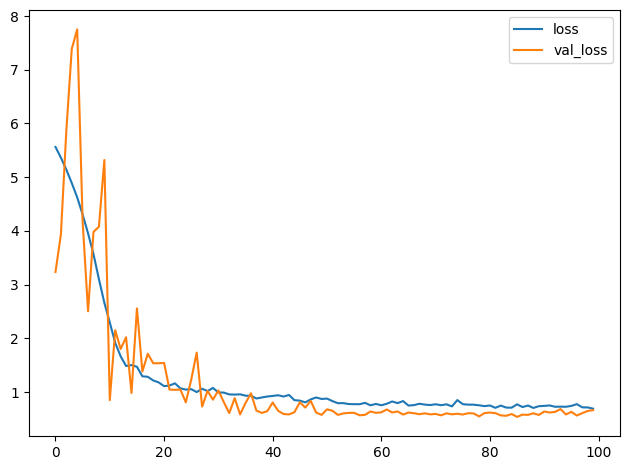

In [8]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Öğrenme eğrilerinden görebileceğiniz gibi, training loss azalmaya devam etse de validation loss neredeyse sabit bir minimumda kalıyor. Bu, dropout eklemenin bu sefer overfitting'i engellediğini gösteriyor. Dahası, network'ün sahte pattern'lara uyum sağlamasını zorlaştırarak, dropout network'ü daha fazla gerçek pattern aramaya teşvik etmiş olabilir. Bu da validation loss'u bir miktar iyileştirmiş olabilir.

Verilerinizi standardize ettiğinizde genellikle daha iyi performans elde edersiniz. Ancak ham verileri kullanabiliyor olmamız, batch normalization'ın daha zorlayıcı veri setlerinde ne kadar etkili olabileceğini gösteriyor.

Bu gözlem birkaç önemli noktayı vurguluyor:

1. Veri ön işleme: Verileri standardize etmek (örneğin, ortalama 0 ve standart sapma 1 olacak şekilde) genellikle model performansını artırır.
2. Batch normalization'ın gücü: Ham verilerle bile makul sonuçlar elde edilebilmesi, batch normalization'ın veri ölçeklendirme konusundaki etkinliğini gösterir.
3. Model dayanıklılığı: Batch normalization, modelin farklı ölçeklerdeki verilere adapte olmasına yardımcı olur.
4. İyi uygulama: İdeal olarak, hem veri ön işleme hem de batch normalization kullanılmalıdır. Bu, modelin daha hızlı ve daha iyi öğrenmesini sağlar.
5. Deneysel yaklaşım: Farklı veri hazırlama ve model mimarisi kombinasyonlarını denemek, en iyi performansı elde etmek için önemlidir.

# Ek Bilgi

Verileri standardize etmek, veri biliminde yaygın bir ön işleme tekniğidir. İşte bu konuyla ilgili açıklama:

Tanım: Standardizasyon, veri noktalarını ortalama 0 ve standart sapma 1 olacak şekilde dönüştürme işlemidir.
Formül: Her veri noktası (x) için: (x - ortalama) / standart sapma

Neden önemli:

1. Farklı ölçeklerdeki özellikleri karşılaştırılabilir hale getirir.
2. Gradient descent gibi optimizasyon algoritmalarının daha hızlı ve kararlı çalışmasını sağlar.
3. Bazı makine öğrenmesi algoritmalarının performansını artırır.

Örnek:

Ham veri: [0, 50, 100]

Standardize edilmiş: [-1.22, 0, 1.22]

Batch normalization ile ilişkisi:

Batch normalization, ağ içinde benzer bir işlem yapar.
Ancak, giriş verilerini standardize etmek hala faydalıdır çünkü ağın başlangıç katmanlarına yardımcı olur.

Uygulama:
Genellikle scikit-learn'ün StandardScaler'ı gibi araçlarla yapılır.
Eğitim verilerine uygulanan aynı dönüşüm, test verilerine de uygulanmalıdır.

Standardizasyon, modelin daha hızlı öğrenmesine ve potansiyel olarak daha iyi performans göstermesine yardımcı olur.

# Ek Bilgi 2

![](image18.png)

Boş bir grafik mi elde ettiniz? Bu ağı bu veri seti üzerinde eğitmeye çalışmak genellikle başarısız olur. Yakınsadığında bile (şanslı bir ağırlık başlatması nedeniyle), genellikle çok büyük bir sayıya yakınsar.

Bu durumun neden kaynaklandığını ve ne anlama geldiğini açıklayayım:

1. Boş grafik: Eğitim sırasında loss değerlerinin çok büyük veya sonsuz (NaN - Not a Number) olması durumunda görülür. Bu, modelin "patladığını" gösterir.
2. Eğitim başarısızlığı: Bu dataset üzerinde bu network'ü eğitmeye çalışmak genellikle başarısız olur. Bu, modelin öğrenemediği anlamına gelir.
3. Lucky weight initialization: Bazen, başlangıç weight'leri tesadüfen iyi bir noktada olursa, model yakınsayabilir (converge). Ancak bu nadir bir durumdur.
4. Büyük sayılara yakınsama: Yakınsasa bile, genellikle çok büyük sayılara yakınsar. Bu, modelin aşırı büyük tahminler yaptığını gösterir.

Bu sorunların olası nedenleri:

1. Uygunsuz model mimarisi: Dataset için çok karmaşık veya basit olabilir.
2. Uygunsuz hiperparametreler: Öğrenme oranı çok yüksek olabilir.
3. Veri ön işleme eksikliği: Veriler normalize edilmemiş olabilir.
4. Gradient patlaması: Gradyanlar çok büyük hale gelerek eğitimi bozabilir.

Çözüm önerileri:

1. Model mimarisini basitleştirmek veya değiştirmek
2. Hiperparametreleri ayarlamak (özellikle öğrenme oranını düşürmek)
3. Verileri normalize etmek
4. Gradient clipping gibi teknikler kullanmak
5. Batch normalization eklemek

Bu tür sorunlar, derin öğrenme modellerini eğitirken sıkça karşılaşılan zorluklardır ve çözümleri genellikle deneme-yanılma gerektirir.

In [9]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch normalization eklemenin ilk denemeden büyük bir iyileştirme olduğunu görebilirsiniz! Veriyi ağdan geçerken adaptif olarak ölçeklendirerek, batch normalization zor veri setleri üzerinde modeller eğitmenize olanak tanır.

Eng.

You can see that adding batch normalization was a big improvement on the first attempt! By adaptively scaling the data as it passes through the network, batch normalization can let you train models on difficult datasets.